In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [4]:
df = pd.read_csv(r"C:\Users\admin\Downloads\BTL AI\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


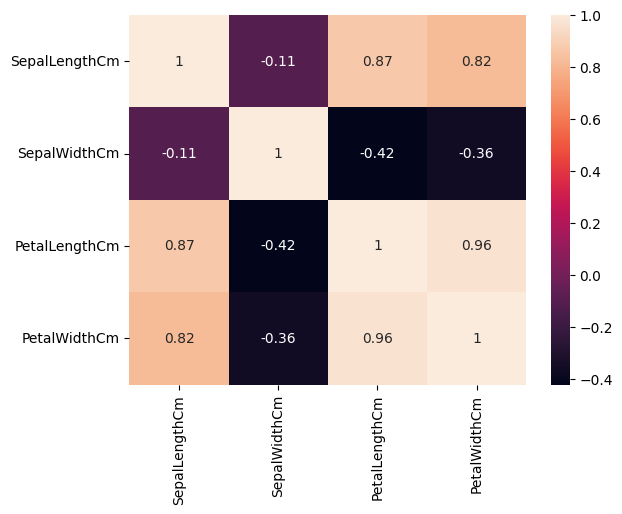

In [6]:
sns.heatmap(df.iloc[:,1:-1].corr(),annot=True)
plt.show()

In [7]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

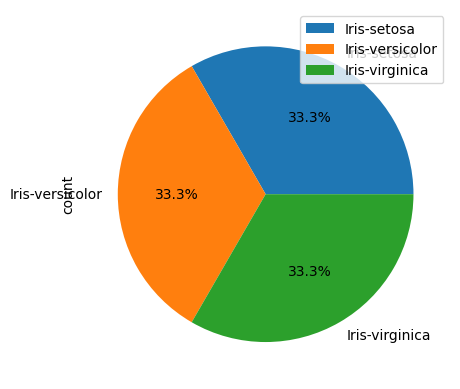

In [8]:
df['Species'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.legend()
plt.show()

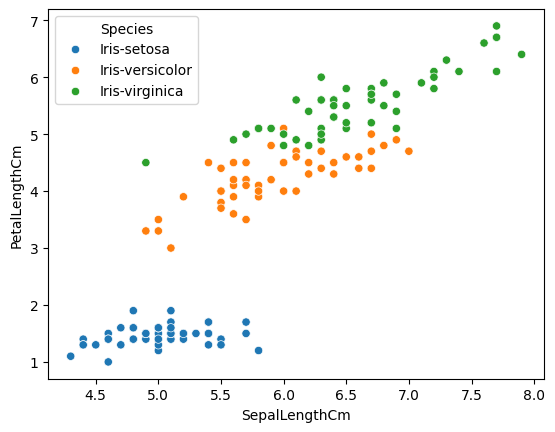

In [9]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['PetalLengthCm'],hue=df["Species"])
plt.show()

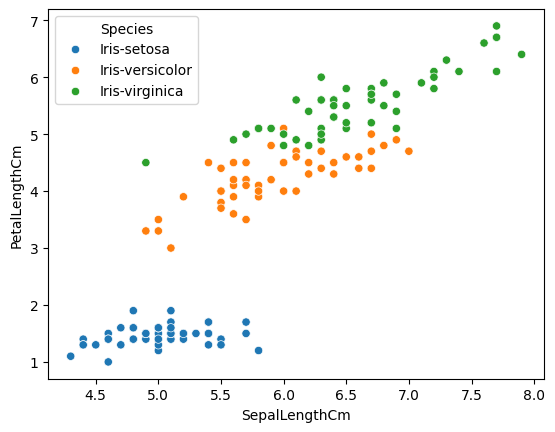

In [10]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['PetalLengthCm'],hue=df["Species"])
plt.show()

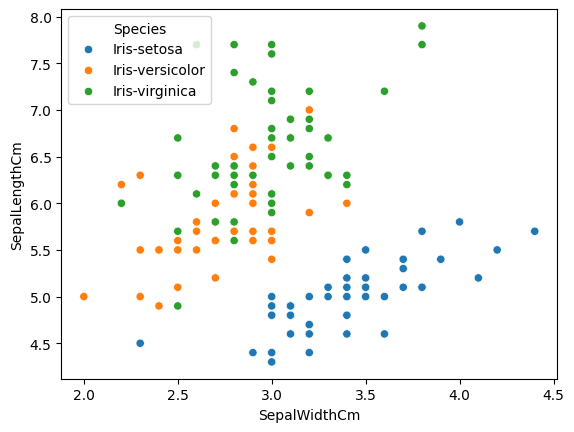

In [11]:
sns.scatterplot(x=df['SepalWidthCm'],y=df['SepalLengthCm'],hue=df["Species"])
plt.show()

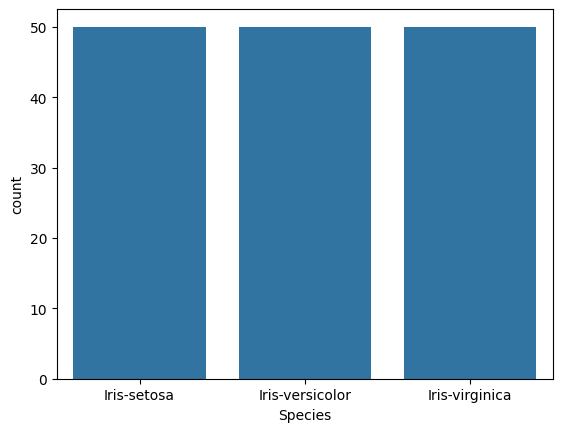

In [12]:
sns.countplot(x=df['Species'])
plt.show()

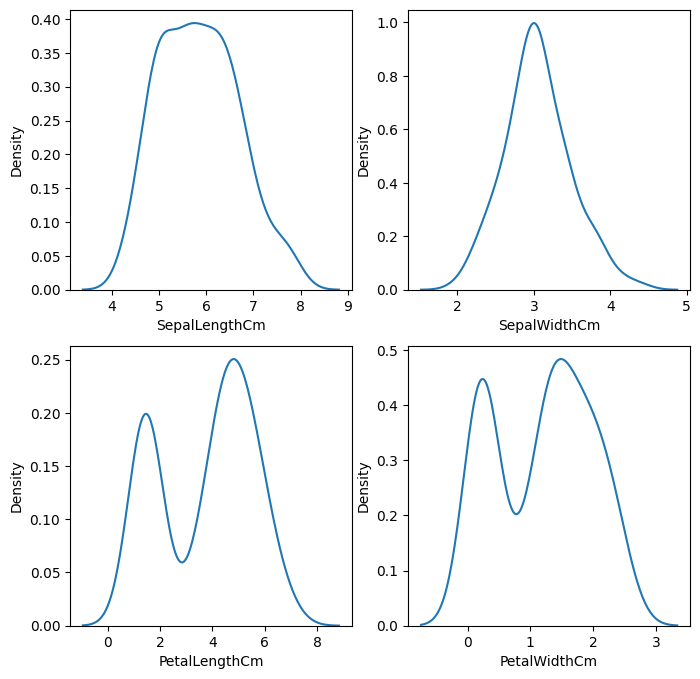

In [13]:
plt.figure(figsize=(8,8))
j=1
for col in df.iloc[:,1:-1]:
    plt.subplot(2,2,j)
    sns.kdeplot(df[col])
    j+=1

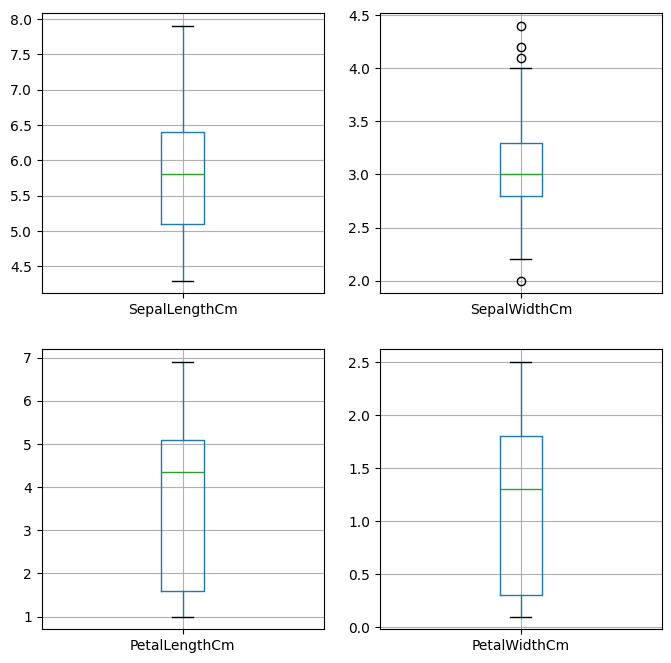

In [14]:
plt.figure(figsize=(8,8))
j=1
for col in df.iloc[:,1:-1]:
    plt.subplot(2,2,j)
    df[[col]].boxplot()
    j+=1

In [15]:
df['Species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [16]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [17]:
df['Species']=df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2})
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [18]:
x = df.drop(["Id","Species"],axis=1)
y = df['Species']

In [19]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [21]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,shuffle=True)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(127, 4)
(127,)
(23, 4)
(23,)


In [23]:
model = SVC(probability=True)
model.fit(x_train,y_train)

SVC(probability=True)

In [24]:
y_pred = model.predict(x_test)
print(f"Actual Label:{y_test.values}")
print(f"Predicted Label:{y_pred}")
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred)*100:.4f} %")

Actual Label:[2 2 1 1 2 0 0 1 2 2 1 1 2 1 2 2 1 0 0 2 0 2 2]
Predicted Label:[2 2 1 1 2 0 0 1 2 2 1 1 2 1 2 2 1 0 0 2 0 2 2]

Accuracy on Test Data:100.0000 %


In [25]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Confusion Matrix:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 5  0  0]
 [ 0  7  0]
 [ 0  0 11]]

Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        11

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [26]:
svm_model = SVC(C=100,kernel="linear",probability=True)
svm_model.fit(x_train,y_train)

SVC(C=100, kernel='linear', probability=True)

In [27]:
y_pred = svm_model.predict(x_test)
print(f"Actual Label:{y_test.values}")
print(f"Predicted Label:{y_pred}")
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred)*100:.4f} %")

Actual Label:[2 2 1 1 2 0 0 1 2 2 1 1 2 1 2 2 1 0 0 2 0 2 2]
Predicted Label:[2 2 1 1 2 0 0 1 2 2 1 1 2 1 2 2 1 0 0 2 0 2 2]

Accuracy on Test Data:100.0000 %


In [28]:
svm_model = SVC(C=100,kernel="linear",probability=True)
svm_model.fit(x_train,y_train)

SVC(C=100, kernel='linear', probability=True)

In [29]:
y_pred = svm_model.predict(x_test)
print(f"Actual Label:{y_test.values}")
print(f"Predicted Label:{y_pred}")
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred)*100:.4f} %")

Actual Label:[2 2 1 1 2 0 0 1 2 2 1 1 2 1 2 2 1 0 0 2 0 2 2]
Predicted Label:[2 2 1 1 2 0 0 1 2 2 1 1 2 1 2 2 1 0 0 2 0 2 2]

Accuracy on Test Data:100.0000 %


In [30]:
svc_model_1 = SVC(probability=True)
param_grid = {"C":np.arange(1,500),
             "kernel":["linear" ,"poly", "rbf"],
             "gamma":np.arange(0,1,0.1),
             "degree":[2,3,4]}

rscv_model = RandomizedSearchCV(svc_model_1,param_grid,cv=5)
rscv_model.fit(x_train,y_train)
rscv_model.best_estimator_

SVC(C=80, degree=2, gamma=0.30000000000000004, kernel='poly', probability=True)

In [31]:
rscv_model.best_score_

0.9612307692307691

In [32]:
# best score achieved during the GridSearchCV
print(f"GridSearch CV best score :{rscv_model.best_score_}")
print()
# print parameters that give the best results
print(f"Parameters that give the best results:\n {rscv_model.best_params_}")

GridSearch CV best score :0.9612307692307691

Parameters that give the best results:
 {'kernel': 'poly', 'gamma': 0.30000000000000004, 'degree': 2, 'C': 80}


In [33]:
new_model = rscv_model.best_estimator_
new_model.fit(x_train,y_train)

SVC(C=80, degree=2, gamma=0.30000000000000004, kernel='poly', probability=True)

In [34]:
y_pred = new_model.predict(x_test)

print(f"Actual Label:{y_test.values}")
print(f"Predicted Label:{y_pred}")
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred)*100:.4f} %")

Actual Label:[2 2 1 1 2 0 0 1 2 2 1 1 2 1 2 2 1 0 0 2 0 2 2]
Predicted Label:[2 2 1 1 2 0 0 1 2 2 1 1 2 1 2 2 1 0 0 2 0 2 2]

Accuracy on Test Data:100.0000 %


In [35]:
print("Accuracy On Test Data:",rscv_model.score(x_test,y_test))

Accuracy On Test Data: 1.0
